<a href="https://colab.research.google.com/github/LaZoark/wine_classifier_scikiet-learn/blob/main/Wine_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 題目：使用 scikit-learn 的 紅酒資料庫以 KNN 分類 70% 訓練,30% 測試, K 值可自選，或用 k-fold 決定 
1. 以 普胺酸(proline, 欄位12) 與 色澤(hue, 欄位10) 進行分類，劃出決策分布圖，並計算分數
2. 以酒精(alcohol, 欄位0), 蘋果酸(malic_acid, 欄位1), 色澤(hue, 欄位10) 進行分類，並計算分數

### 載入套件、工具與資料集

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap

#### 定義處理函數(取自老師講義)

In [198]:
# 兩變數輸入分類問題劃出分隔區域
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 類別1: 方塊, 橘色
    # 類別2: 打叉, 深藍色
    # 類別3: 圈圈, 綠色
    # test\_idx: 測試點的所在
    # resolution: 格子點解析點
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('orange', 'darkblue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))+3])
    # 將每一格子點進行分類，並著色
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1     
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,
        resolution), np.arange(x2_min, x2_max, resolution))
    # 取得資料，進行繪圖
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # 劃出資料點
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl,1],alpha=0.6,
            c=colors[idx],
            edgecolor='black',
            marker=markers[idx],label=cl)
    # 測試取樣 強化式繪圖
    if test_idx.any():
        X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
        plt.scatter(X_test[:, 0],X_test[:, 1],
            c=np.array(colors)[y_test.astype(int)],
            alpha=1.0,
            edgecolor='black',
            linewidths=1,
            marker='o',
            s=55, label='test set')

# 第一題：
以 普胺酸(proline, 欄位12) 與 色澤(hue, 欄位10) 進行分類，劃出決策分布圖，並計算分數

### 載入紅酒資料

In [199]:
wine = datasets.load_wine()

#### 定義分類標籤

In [200]:
x = wine.data[:,[12,10]]    # 普胺酸還有色澤
y = wine.target   

#### 提高圖表可讀性

In [201]:
x[:,0] = x[:,0]/300    #縮放Proline的比例

### 以K-Fold方法來決定k值

In [202]:
# 變更群組數目, 從群組個數 1 至 30
Ks = np.arange(1, round(0.2*len(x) + 1))
accuracies=[]
for k in Ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, scoring="accuracy", cv=20)    
    accuracies.append(scores.mean())    # 每個都嘗試

#### 分數與k值對應曲線圖

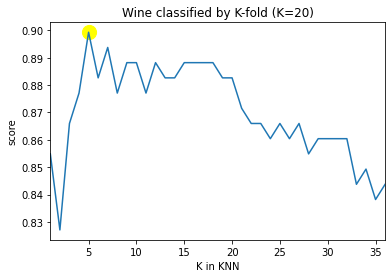

In [203]:
plt.plot(Ks, accuracies)
acc_array=np.array(accuracies)  # 轉 list 成 ndarray
imax=acc_array.argmax()         # 最後找出最大值
plt.scatter(Ks[imax],acc_array[imax],s=200,color='yellow')
plt.xlabel('K in KNN')
plt.xlim([Ks[0],Ks[-1]])
plt.ylabel('score')
plt.title('Wine classified by K-fold (K=20)')
plt.show()

#### 最好的k值

In [204]:
print('成績最高的 KNN 為 K=',Ks[imax])
print('最高成績={:.4f}'.format(acc_array[imax]))
k = Ks[imax]
# 定義knn模型
knn = neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance') #利用距離的倒數作為加權，改善同票問題。

成績最高的 KNN 為 K= 5
最高成績=0.8993


### 資料分割 ：70% 訓練, 30% 測試

In [205]:
from sklearn.model_selection import train_test_split
indice=np.arange(y.size)  
x_train, x_test, y_train, y_test,indice_train,indice_test=train_test_split(x, y,indice,test_size=0.3, random_state=0)

### 訓練資料集

In [206]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

### 畫出決策分布圖

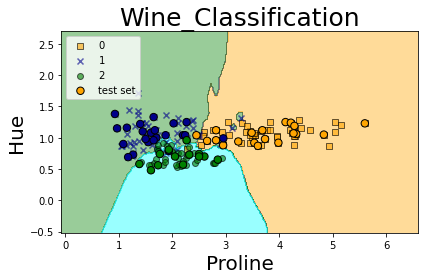

In [207]:
plot_decision_regions(x, y, test_idx=indice_test,classifier=knn)
plt.legend(loc='upper left')
plt.title('Wine_Classification',fontsize=25)
plt.xlabel('Proline',fontsize=20)
plt.ylabel('Hue',fontsize=20)
plt.tight_layout()

### 輸出分數結果

In [208]:
print('訓練分數={:.4f}'.format(knn.score(x_train,y_train)))
print('測試分數={:.4f}'.format(knn.score(x_test, y_test)))
y_predict=knn.predict(x_test)
right=sum(y_test==y_predict)
wrong=sum(y_test!=y_predict)
print('測試數={:d},正確數={:d},錯誤數={:d}'.format(y_test.size,right,wrong))
print('準確率={:.4f}'.format(right/y_test.size))

訓練分數=1.0000
測試分數=0.8889
測試數=54,正確數=48,錯誤數=6
準確率=0.8889


# 第二題：
以酒精(alcohol, 欄位0), 蘋果酸(malic_acid, 欄位1), 色澤(hue, 欄位10) 進行分類，並計算分數

### 重新將x指定為酒精、蘋果酸及色澤
其實只需要改x那行，其他程式皆無須改變

In [209]:
x = wine.data[:,[0,1,10]]   # 酒精、蘋果酸及色澤
y = wine.target

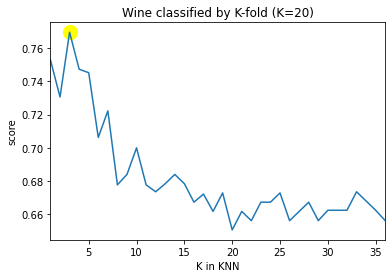

成績最高的 KNN 為 K= 3
最高成績=0.7694
訓練分數=1.0000
測試分數=0.7222
測試數=54,正確數=39,錯誤數=15
準確率=0.7222


In [210]:
 x[:,0] = x[:,0]/300

"""# 以K-Fold方法來決定k值"""

# 變更群組數目, 從群組個數 1 至 30
Ks = np.arange(1, round(0.2*len(x) + 1))
accuracies=[]
for k in Ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, scoring="accuracy", cv=20)    
    accuracies.append(scores.mean())    # 每個都嘗試

"""# 分數與k值對應曲線圖"""

plt.plot(Ks, accuracies)
acc_array=np.array(accuracies)  # 轉 list 成 ndarray
imax=acc_array.argmax()         # 最後找出最大值
plt.scatter(Ks[imax],acc_array[imax],s=200,color='yellow')
plt.xlabel('K in KNN')
plt.xlim([Ks[0],Ks[-1]])
plt.ylabel('score')
plt.title('Wine classified by K-fold (K=20)')
plt.show()

"""# 最好的k值"""

print('成績最高的 KNN 為 K=',Ks[imax])
print('最高成績={:.4f}'.format(acc_array[imax]))
k = Ks[imax]
# 定義knn模型
knn = neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance') #利用距離的倒數作為加權，改善同票問題。

"""# 資料分割 ：70% 訓練, 30% 測試"""

from sklearn.model_selection import train_test_split
indice=np.arange(y.size)  
x_train, x_test, y_train, y_test,indice_train,indice_test=train_test_split(x, y,indice,test_size=0.3, random_state=0)

"""# 訓練資料集"""

knn.fit(x_train, y_train)

"""# 輸出分數結果"""

print('訓練分數={:.4f}'.format(knn.score(x_train,y_train)))
print('測試分數={:.4f}'.format(knn.score(x_test, y_test)))
y_predict=knn.predict(x_test)
right=sum(y_test==y_predict)
wrong=sum(y_test!=y_predict)
print('測試數={:d},正確數={:d},錯誤數={:d}'.format(y_test.size,right,wrong))
print('準確率={:.4f}'.format(right/y_test.size))